In [30]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [3]:
# URL of the CSV file
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'

In [4]:
# Read the CSV file into a pandas DataFrame
data = pd.read_csv(url)

# Display the first few rows of the DataFrame
print(data.head())

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


In [5]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
data.shape

(25, 2)

In [11]:
# Define a function to detect outliers using the IQR method
def detect_outliers_iqr(data):
    Q1 = data['Scores'].quantile(0.25)
    Q3 = data['Scores'].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = data[(data['Scores'] < lower_bound) | (data['Scores'] > upper_bound)]
    return outliers

# Call the function and print the outliers
outliers = detect_outliers_iqr(data)
print("Outliers:")
print(outliers)


Outliers:
Empty DataFrame
Columns: [Hours, Scores]
Index: []


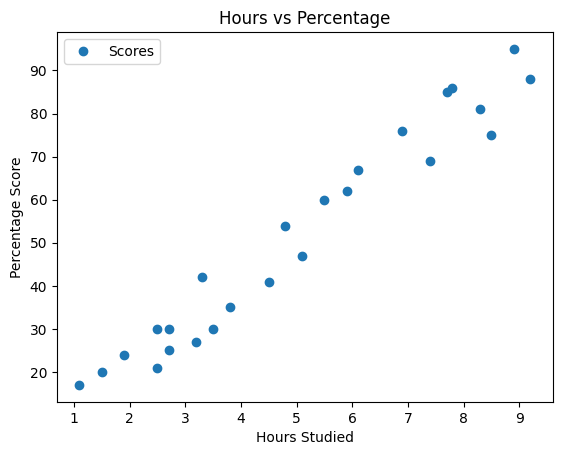

In [23]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [13]:
# Defining the features and target variable
X = data[['Hours']]
y = data['Scores']

In [21]:
X.shape, y.shape

((25, 1), (25,))

In [14]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
# Creating the model
model = LinearRegression()

In [16]:
# Fitting the model to the training set
model.fit(X_train, y_train)

LinearRegression()

In [32]:
# Predicting the score for 9.25 hours
hours_studied = np.array([[9.25]])
predicted_score = model.predict(hours_studied)

In [18]:
print(f'The predicted score for a student who studies for {hours_studied[0][0]} hours is: {predicted_score[0]}')

The predicted score for a student who studies for 9.25 hours is: 93.69173248737538


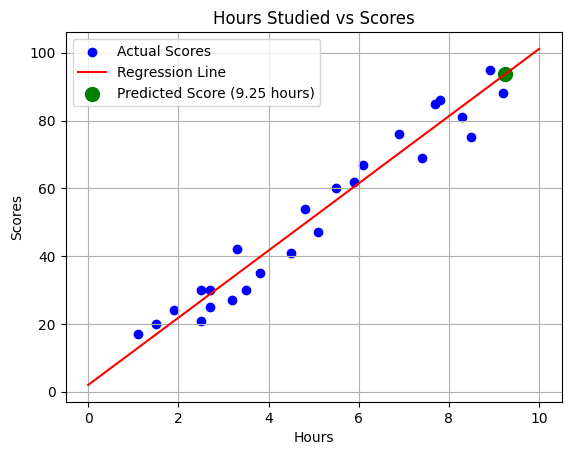

In [31]:
plt.scatter(X, y, color='blue', label='Actual Scores')

# Create a line of regression from the model predictions
X_line = np.linspace(0, 10, 100).reshape(-1, 1)  # Generate X values for the line
y_line = model.predict(X_line)  # Predict corresponding Y values
plt.plot(X_line, y_line, color='red', label='Regression Line')  # Plot the regression line

# Highlight the point of prediction
plt.scatter(hours_studied, predicted_score, color='green', label='Predicted Score (9.25 hours)', s=100)

# Add labels and title
plt.title('Hours Studied vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.grid()

# Display the plot
plt.show()